# Shannon, logarithms, decibels and Friis
This notebook is part of the Advanced Wireless and 5G class - and will help you understand the behavior of Shannon's formula (hopefully) as well as refresh your knowledge on how to work with logarithms and decibels. It finished with the use of Friis transmission formula to calculate coverage.

©️2023 Michael Peeters

## Shannon's formula of capacity for an AWGN

With
- $C$ as capacity (in bits/second)
- $W$ as the bandwidth (in cycles/second, /second which is equivalent to $\mathrm{Hz}=\frac{1}{\mathrm{s}}$)
- $P_r$ as the received signal power (in Watt)
- $N_0$ as the noise density (in Watt/Hz)

$$
C = W \log_2 \left( 1+\frac{P_r}{N_0 W} \right)
$$

Often, we rewrite $\left(\frac{P_r}{N_0 W}\right)=\mathit{SNR}$, signal-to-noise ratio, and


$$
C=W\log_2\left(1+\mathit{SNR}\right)\:\mathrm{Mbps}
$$

As an example, if we now take $W=1\mathrm{MHz}$, then C is expressed in $\mathrm{Mbps}$, and at a signal to noise ratio of $\mathit{SNR}=1$, we have 

$$
C = \log_2(1+1) \mathrm{Mbps} = \log_2(2) \mathrm{Mbps}= 1\mathrm{Mbps}
$$

which tells us that even when the noise at the receiver is equal in power to the received (wanted) signal, we can still transmit without errors up to 1 Mbps (it unfortunately does not tell us how to achieve this).

### Spectral Efficiency
If we bring the bandwidth to the other side, we get the definition of spectral efficiency which is a often-used measure of how good a certain approach is.

$$
\eta=\frac{C}{W}=\log_2(1+\mathit{SNR})
$$

#### Definitions

In [1]:
import numpy as np

from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 9)

# simple shannon, this is actually spectral efficiency
def spectral_efficiency(SNR):
    return np.log2(1+SNR)

# full shannon
def shannon(W, N0, P):
    SNR=P/(W*N0)
    C=W*spectral_efficiency(SNR)
    return C

# plot 100 points from SNR1 to SNR2
def plot_SE(SNR1, SNR2): 
    snr = np.linspace(SNR1,SNR2,100)
    SE=spectral_efficiency(snr)
    plt.xlabel("SNR")
    plt.ylabel("C")
    return plt.plot(snr,SE)

### Spectral efficiency for low SNR (<1)
As you can see, it is more or less linear at low SNR (at constant W).

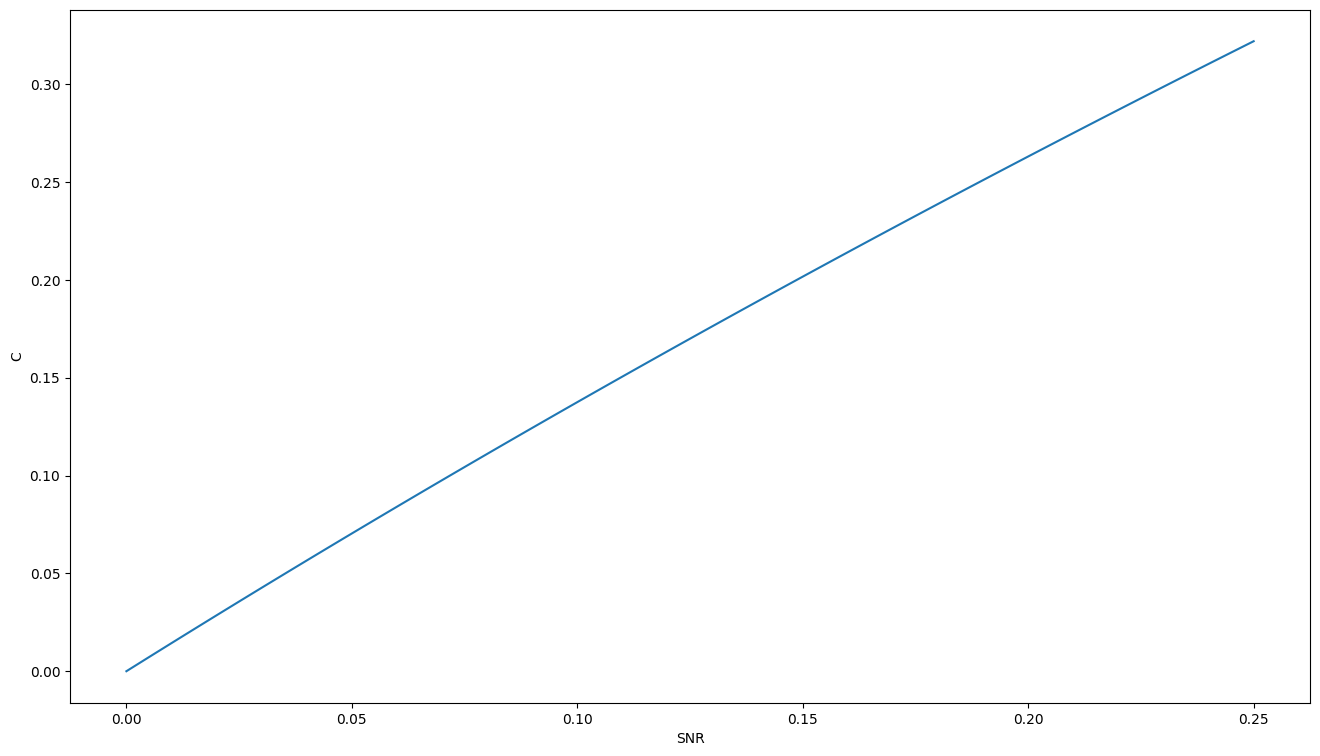

In [2]:
plot_SE(0,0.25)

### SE at high SNR (>10)
At high SNR, we see a logarithmic behavior (which means, as we will see, that it is linear when the SNR is expressed in dB).

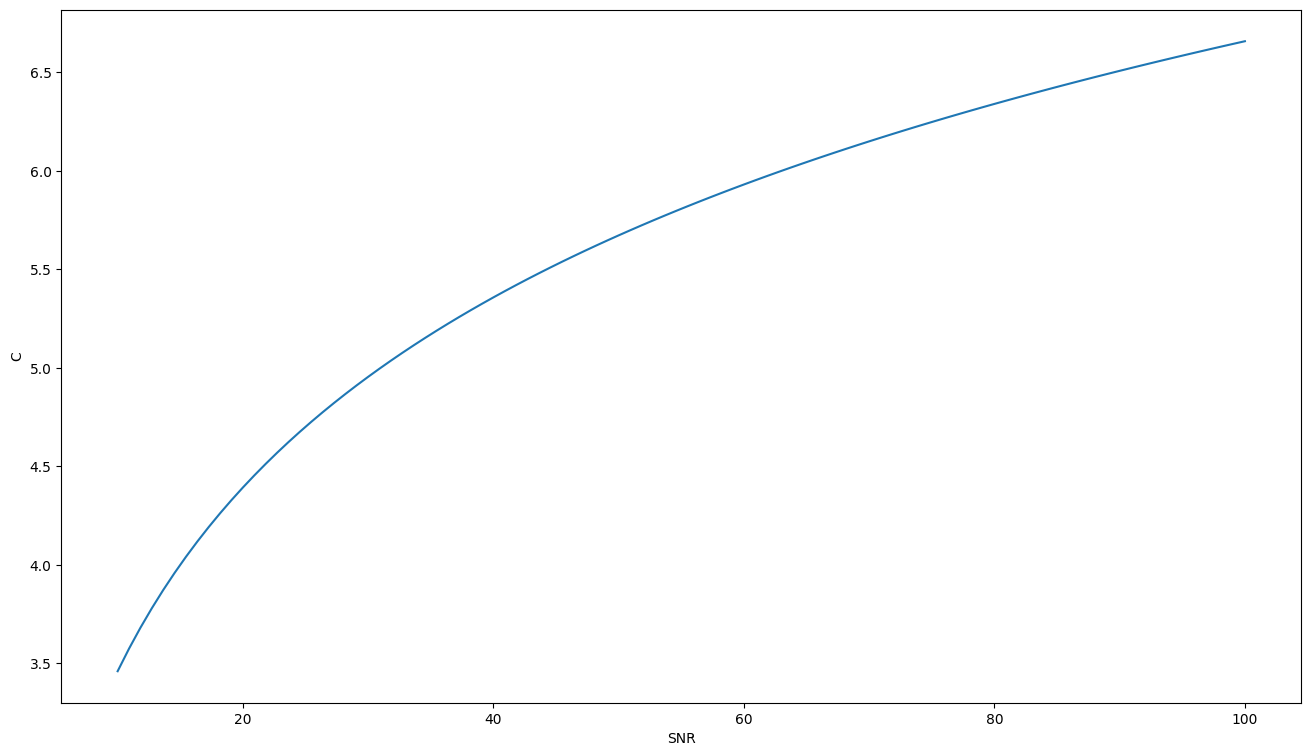

In [3]:
plot_SE(10,100)

## Shannon in power and bandwidth limited cases

#### Definitions

In [4]:
# plot shannon for a given power, as a function of bandwidth
def plot_shannon_P (P,W0,W1,N0=1):
    W=np.linspace(W0, W1, 100)
    C=shannon(W,N0,P)
    plt.xlabel("W")
    plt.ylabel("C")
    return plt.plot(W,C)

### Overall

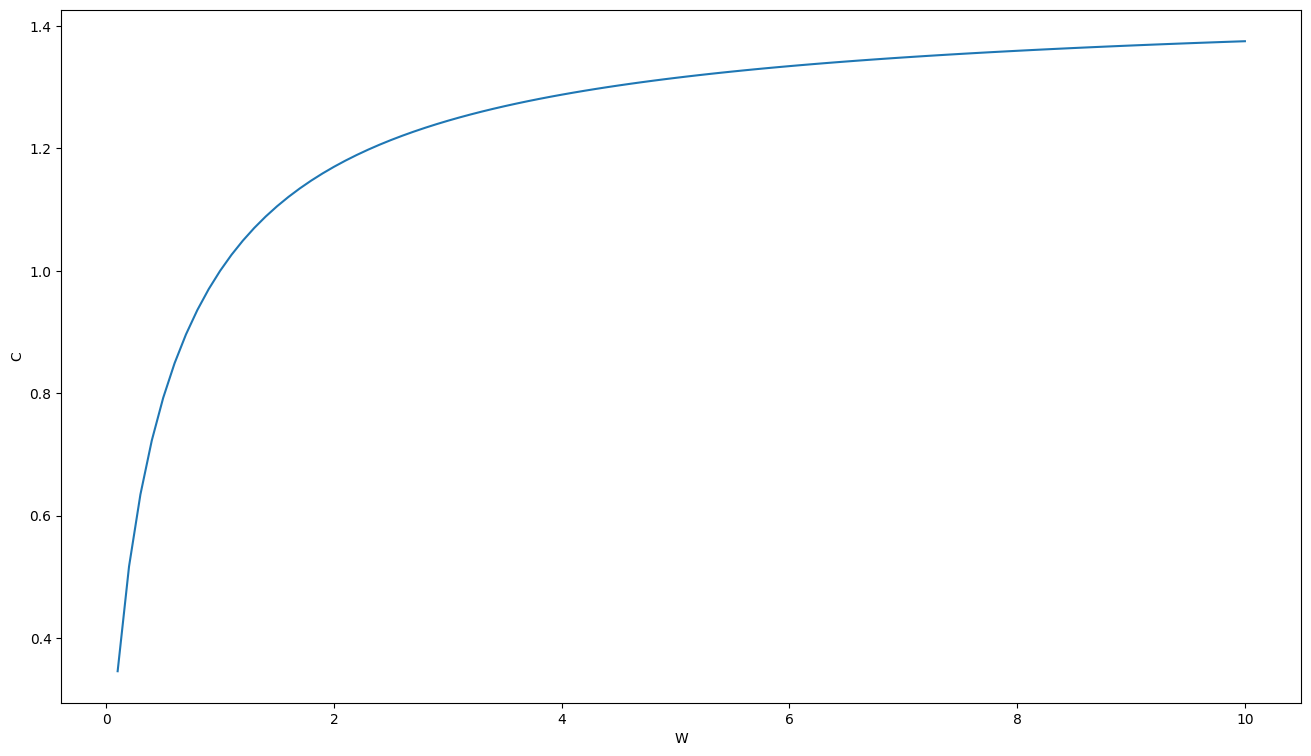

In [5]:
plot_shannon_P(1,0.1,10)

Observe that the value of C asymptotically goes to 1.44 W.

### Low bandwidth

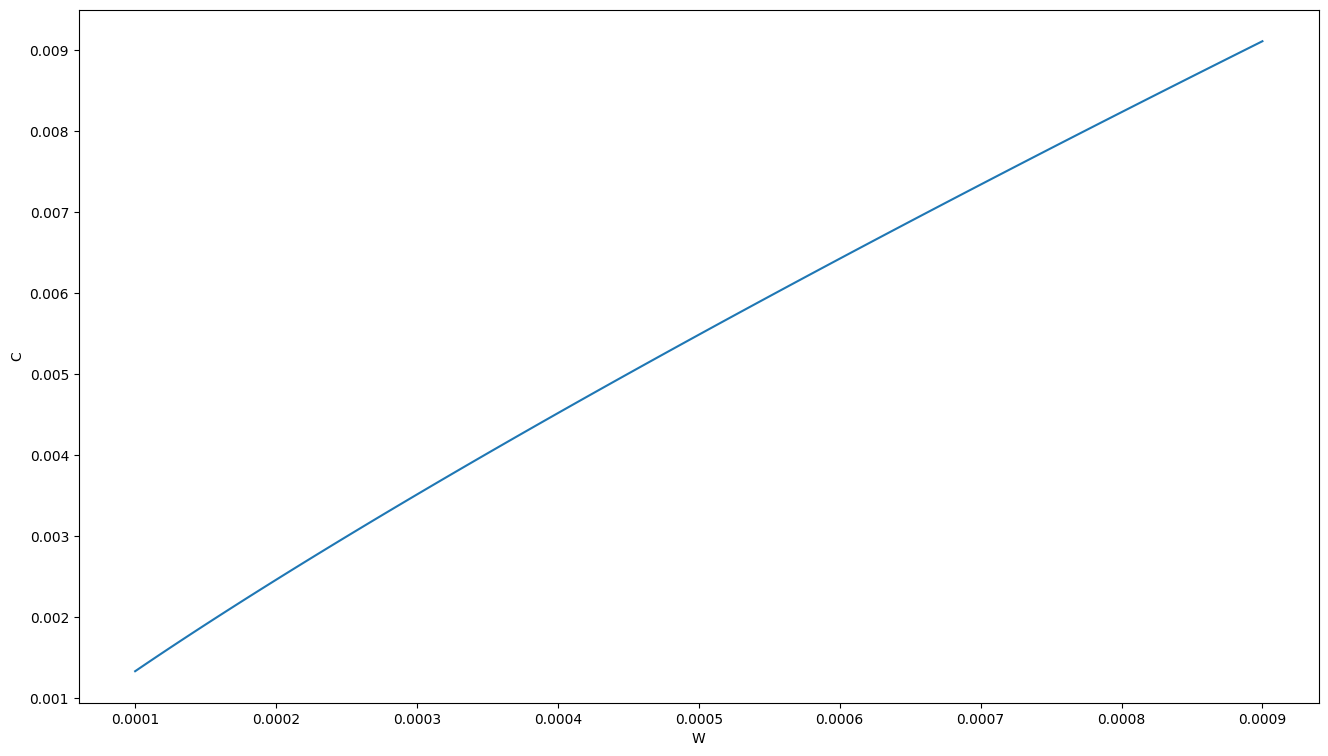

In [6]:
plot_shannon_P(1,0.0001,0.0009)

It is linear for low W.

### High bandwidth

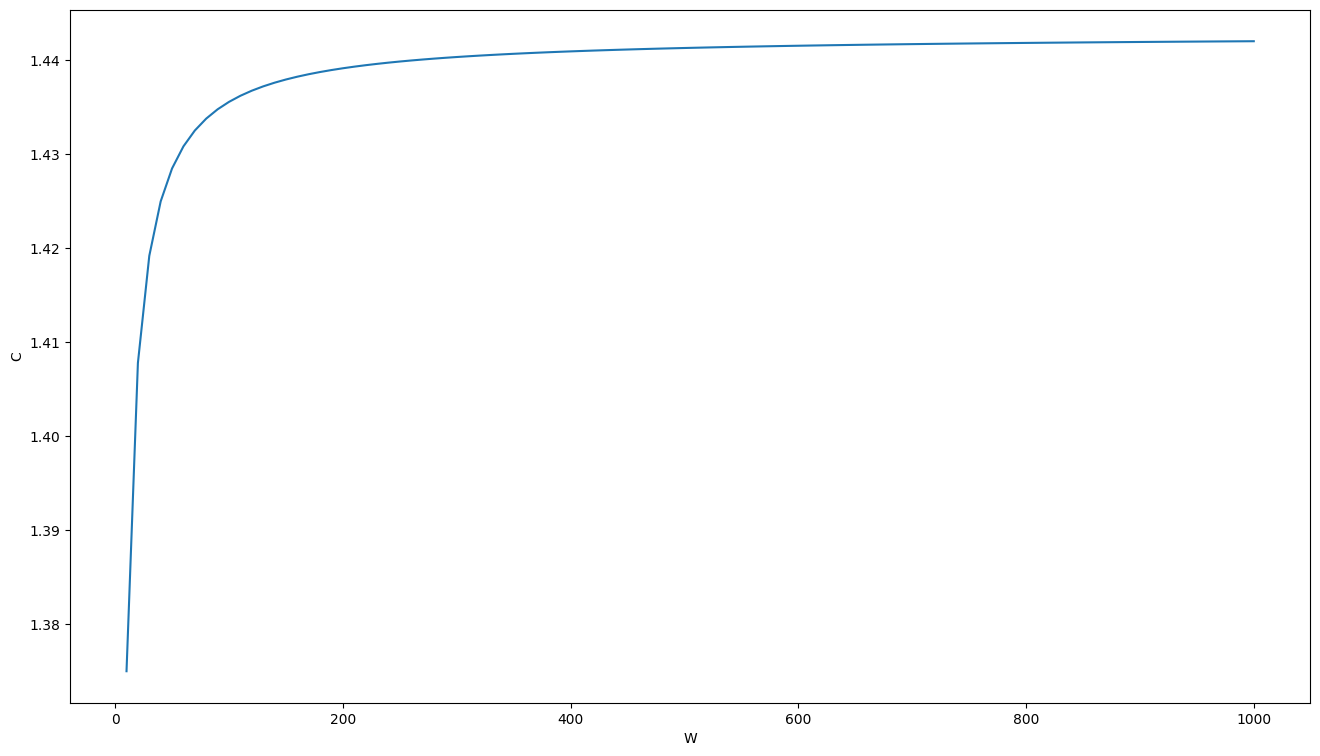

In [7]:
plot_shannon_P(1,10,1000)

It saturates at high bandwidth $W\rightarrow\infty$. This is called the **power limited** region ass the bandwidth has no influence, but it still scales with power. An equivalent way to look at it is to say that the SNR is close to zero. In the limit:
$$
\lim_{W\rightarrow\infty}{C}=\frac{P_r}{N_0\ln 2}
$$
The other regime is the **bandwidth limited** region where the capacity is logaritmic in power but approximately linear in bandwidth. 
$$
\lim_{W\rightarrow0}{C}=W\log_2\frac{P_r}{N_0 W}
$$
Note that a similar statement can be made for $\mathit{SNR}\rightarrow\infty$. 

## Logarithms
So we see that logarithms show up quite often. Moreover, as we will shortly see, the range of $P_r$ can be really large and the noise $N_0$ small which leads to huge variations in the order of magnitude of $\mathit{SNR}$. This is another reason to refresh the use of logarithms.

### Definition
Without too much mathematical rigor, we can say that the logarithm *in base* $a$ of a number is the inverse operation of the exponentiation of $a$:
$$
\log_a y=x \iff y=a^x\;\mathrm{for}\; y,a\in \mathbb{R}_{\geq0}
$$
So for example
$$
\log_{10} 100=2 \iff 100=10^2
$$
and
$$
\log_{2} 1024=10 \iff 1024=2^{10}
$$
Apart from base 2 (used in information theory) and base 10, there is one other base that is often used, which is base e, which is called the natural logarithm and written $\ln x=\log_e x$.
$$
\log_{e} \pi\approx1.145 \iff \pi\approx e^{1.145}
$$

One very important comment here when using quantities with units (such as m, W, s): **you cannot take a logarithm of a number that has a unit still attached**. This means all quantities inside a logarithm should be dimensionless. Take the spectral efficiency $\eta=\log_2{1+\mathit{SNR}}$. You immediately see that the $\log_2$ is taken over $1+\mathit{SNR}$ which contains the number 1 (dimensionless) and already tells you that SNR cannot have dimensions/units. However, if you use the approximation $\log_2\mathit{SNR}$ you may forget this. Always check as it can help you avoid errors.

### Properties
Apart from being able to reduce large numbers to smaller ones (e.g. $log_{10}{10}=1$ and l$og_{10}{1000000}=6$), it also can make working with large numbers easier because of the following properties:
- $\log_a{xy}=\log_a{x}+\log_a{y}$, the logarithm of a product is the sum of the logarithms
- $\log_a{x/y}=\log_a{x}-\log_a{y}$, a generalization for fractions (easily proven for $y\neq0$)
- $\log_a{1/x}=-\log_a{x}$, which follows from the above
- $\log_a(x^y)=y\log_a{x}$, extension to exponentiation
- $\log_a{x}=\log_ba\log_b{x}$, which you can see by writing $x=b^{\log_bx}$ and using the previous property

## Decibels
One very common use of logarithms, as stated earlier, is to reduce the range of variables that vary over orders of magnitude. The common approach is to express such quantities in decibels (dB) and using a logartihmic scale. For historical reasons, there is an additional factor of 10 used: so for a (dimensionless quantity) X, X in dB is
$$
X^{\mathrm{dB}}=10\log_{10}X
$$

However, since logarithms can only be taken when the number is dimensionless, this is can be done **only when we are looking at a ratio**. In other words, a number expressed in dB is always a ratio vs. something. When the number is already a dimensionless ratio, such as the signal-to-noise ratio (SNR), this is written directly in dB. In other cases, you need something to compare it to - and this is added to the unit.
- relative to 1 Watt (W): $X^{\mathrm{dBW}}=10\log_{10}{\frac{X}{1\mathrm{W}}}$
- relative to 1 milliWatt (mW), one that we will use often: $X^{\mathrm{dBm}}=10\log_{10}{\frac{X}{1\mathrm{mW}}}$
- relative to the carrier, $X^{\mathrm{dBc}}=10\log_{10}{\frac{X}{X_c}}$
- relative to an isotropic radiator, $X^{\mathrm{dBi}}=10\log_{10}{\frac{X}{X_i}}$
Another way to put it, using decibels requires a reference point.

### Examples
- an SNR=10: $\mathit{SNR}^\mathrm{dB}=10\log_{10}{10}=10\mathrm{dB}$. $\rightarrow$ Something to remember: a factor 10 difference is 10dB
- an SNR=100: $\mathit{SNR}^\mathrm{dB}=10\log_{10}{100}=20\mathrm{dB}$. 
- an SNR=1 (equal power): $\mathit{SNR}^\mathrm{dB}=10\log_{10}{1}=0\mathrm{dB}$. $\rightarrow$ Something to remember: a ratio of 1 is 0dB
- an SNR=2: $\mathit{SNR}^\mathrm{dB}=10\log_{10}2\approx3\mathrm{dB}$. $\rightarrow$ Something to remember: a factor 2 difference is (about) 3dB
- an SNR=0.001: $\mathit{SNR}^\mathrm{dB}=10\log_{10}{\frac{1}{1000}}=-10\log_{10}{1000} =-30\mathrm{dB}$. Don't forget that logarithms and decibels can be negative.

### A useful example
We can immediate use these properties when looking at the capacity or even better the spectral efficiency in the high SNR regime:
$$
\eta=C/W=\log_2{1+\mathit{SNR}}\approx\log_2{\mathit{SNR}}\:\:\:\mathit{SNR}\gg1
$$
If we now express the SNR in dB,
$$
\mathit{SNR}^\mathrm{dB}=10\log_{10}\mathit{SNR}\iff\mathit{SNR}=10^{\mathit{SNR}^\mathrm{dB}/10}
$$
Then
$$
\eta=\log_2{\mathit{SNR}}=\log_2{\mathit{10^{\mathit{SNR}^\mathrm{dB}/10}}}=\log_2{10}\frac{\mathit{SNR}^\mathrm{dB}}{10}\approx\frac{1}{3}\mathit{SNR}^\mathrm{dB}
$$
So we we see that in the high SNR range, the spectral efficiency is about one third of the SNR expressed in dB.

### Typical power levels and their magnitude in dBm

In [8]:
def to_dB(power_ratio):
    return 10.*np.log10(power_ratio)

def to_ratio(dB):
    return 10**(dB/10)

def to_W(dBm):
    return 10**(dBm/10)/1000

def power_in_dBm(power_in_mW):
    return to_dB(power_in_mW)

In [9]:
import pandas as pd
power_levels_data = [["Wifi Access Point",250,0],
                ["5G Small Cell (1W)",1000,0],
                ["5G Basestation (4x20W)",80000,0],
                ["5G Mobile Handset",200,0]
               ]
power_levels = pd.DataFrame(power_levels_data, columns=["Type", "Power in mW", "Power in dBm"])
power_levels["Power in dBm"]=power_levels["Power in mW"].apply(power_in_dBm)

power_levels.style.format({"Power in dBm": "{:.2f}"}).hide(axis="index")



Type,Power in mW,Power in dBm
Wifi Access Point,250,23.98
5G Small Cell (1W),1000,30.00
5G Basestation (4x20W),80000,49.03
5G Mobile Handset,200,23.01


## Power spectral density
We always talk about the power of a signal. However, as we also have seen, a signal uses a certain amount of bandwidth. We will here assume that the power is uniformately distributed over that bandwidth. This leads to the defintion of the **power spectral density (PSD)**.
$$
\mathit{PSD}=\frac{P}{W}\;\text{in}\;\frac{\mathrm{W}}{\mathrm{Hz}}
$$
We see that e.g. having the same power in half the bandwidth will double the PSD. You can express the PSD in dBm/Hz as well, but be very careful as you are the assuming that the bandwidth is the always the same in the ratio. Best is to always explictly involve the bandwidth W.

## Noise levels
Noise is also expressed in mW (or Watts). However, the amount of (white) noise you pick up in a certain channel depends on the bandwidth of the channel. This is why we write the noise power as:
$$
P_{\mathrm{noise}}=N_0W
$$
where $N_0$ is the noise power spectral density

### Noise power spectral density for thermal noise
The one noise source that is always present is thermal noise (also called Johnson-Nyquist noise). It is always present and its (white) PSD can be calculated as:
$$
N_0^\mathrm{thermal}=N_0=k_BT
$$
where $T$ is the temperature (expressed in degrees Kelvin K, which is the temperature in degrees Celsius + 273.16) and $k_B$ is the Boltzmann constant ($1.38\times10^{-23}\frac{\mathrm{J}}{\mathrm{K}}$ - Joules/Kelvin). This gives us the formula for thermal noise
$$ P_{\mathrm{noise}}=N_0W=k_BTW $$
which indeed (do the dimensional analysis) gives us a value in W (or mW).

### Typical noise levels and their value in dBm

In [10]:
def noise_PSD(temperature_in_Kelvin):
    kB=1.33E-23
    return kB*temperature_in_Kelvin

def noise_level_mW(bandwidth_in_MHz, temperature_in_Kelvin):
    kB=1.33E-23
    MHz=1E6
    WtomW=1000
    return WtomW*bandwidth_in_MHz*MHz*noise_PSD(temperature_in_Kelvin)

#### Some numbers

In [11]:
noise_levels_data = [["Wifi 2 20 MHz",20,0,0],
                     ["2G 200 kHz",0.2,0,0],
                     ["Wifi 6 160 MHz",160,0,0],
                     ["5G 40MHz",40,0,0]
               ]
noise_levels = pd.DataFrame(noise_levels_data, columns=["Type", "Bandwidth in MHz","Noise in mW","Noise in dBm"])
noise_levels["Noise in mW"]=noise_levels["Bandwidth in MHz"].apply(lambda W: noise_level_mW(W,300))
noise_levels["Noise in dBm"]=noise_levels["Noise in mW"].apply(power_in_dBm)

print("At room temperature, 300K")
noise_levels.style.format({
                            "Noise in mW": "{:.2e}",
                           "Noise in dBm": "{:.1f}"
                          }).hide(axis="index")

At room temperature, 300K


Type,Bandwidth in MHz,Noise in mW,Noise in dBm
Wifi 2 20 MHz,20.000000,7.98e-11,-101.0
2G 200 kHz,0.200000,7.98e-13,-121.0
Wifi 6 160 MHz,160.000000,6.38e-10,-91.9
5G 40MHz,40.000000,1.60e-10,-98.0


#### Or for the previous examples

In [12]:
power_levels_data = [["Wifi Access Point",250,0,10,0,0],
                ["5G Small Cell (1W)",1000,0,20,0,0],
                ["5G Basestation (4x20W)",80000,0,100,0,0],
                ["5G Mobile Handset",200,0,20,0,0]
               ]
power_levels = pd.DataFrame(power_levels_data, columns=["Type", "Power in mW", "Power in dBm", "Bandwidth in MHz","Noise in mW","Noise in dBm"])
power_levels["Power in dBm"]=power_levels["Power in mW"].apply(power_in_dBm)
power_levels["Noise in mW"]=power_levels["Bandwidth in MHz"].apply(lambda W: noise_level_mW(W,300))
power_levels["Noise in dBm"]=power_levels["Noise in mW"].apply(power_in_dBm)

print("At room temperature, 300K")
power_levels.style.format({"Power in dBm": "{:.1f}",
                            "Noise in mW": "{:.2e}",
                           "Noise in dBm": "{:.1f}"
                          }).hide(axis="index")


At room temperature, 300K


Type,Power in mW,Power in dBm,Bandwidth in MHz,Noise in mW,Noise in dBm
Wifi Access Point,250,24.0,10,3.99e-11,-104.0
5G Small Cell (1W),1000,30.0,20,7.98e-11,-101.0
5G Basestation (4x20W),80000,49.0,100,3.99e-10,-94.0
5G Mobile Handset,200,23.0,20,7.98e-11,-101.0


### Typical signal to noise levels (at the transmit side)
Given all of the above, we can now easily compute the SNR by either dividing the values of the power and noise in mW or *subtracting* the values in dBm. This we will do assuming no attenuation. Note two things:
1) the SNR can be a very large value if expressed as a ratio; in dB it is manageable
2) that the end result is a ratio and hence is in dB (not dBm)

In [13]:
power_levels["SNR"]=power_levels.apply(lambda data : data["Power in mW"]/data["Noise in mW"],axis=1)
power_levels["SNR in dB"]=power_levels.apply(lambda data : data["Power in dBm"]-data["Noise in dBm"],axis=1)


print("At room temperature, 300K")
power_levels.style.format({"Power in dBm": "{:.2f}",
                            "Noise in mW": "{:.2e}",
                           "Noise in dBm": "{:.2f}",
                           "SNR": "{:.0f}",
                           "SNR in dB": "{:.2f}"
                          }).hide(axis="index")


At room temperature, 300K


Type,Power in mW,Power in dBm,Bandwidth in MHz,Noise in mW,Noise in dBm,SNR,SNR in dB
Wifi Access Point,250,23.98,10,3.99e-11,-103.99,6265664160401,127.97
5G Small Cell (1W),1000,30.00,20,7.98e-11,-100.98,12531328320802,130.98
5G Basestation (4x20W),80000,49.03,100,3.99e-10,-93.99,200501253132832,143.02
5G Mobile Handset,200,23.01,20,7.98e-11,-100.98,2506265664160,123.99


We can even add the spectral efficiency (as clearly, $\mathit{SNR} \gg 1$). You see a very large number - in 10MHz, you could transmit >400Mbps, apparently. This is because we are using the transmit power, and assuming there is no attentuation (i.e. you are right next to the transmitting antenna).

In [14]:
power_levels["SE in bits/Hz"]=power_levels["SNR in dB"].apply(lambda SNR: SNR/3)

print("At room temperature, 300K")
power_levels.style.format({"Power in dBm": "{:.2f}",
                            "Noise in mW": "{:.2e}",
                           "Noise in dBm": "{:.2f}",
                           "SNR": "{:.0f}",
                           "SNR in dB": "{:.2f}",
                           "SE in bits/Hz": "{:.0f}"
                          }).hide(axis="index")


At room temperature, 300K


Type,Power in mW,Power in dBm,Bandwidth in MHz,Noise in mW,Noise in dBm,SNR,SNR in dB,SE in bits/Hz
Wifi Access Point,250,23.98,10,3.99e-11,-103.99,6265664160401,127.97,43
5G Small Cell (1W),1000,30.00,20,7.98e-11,-100.98,12531328320802,130.98,44
5G Basestation (4x20W),80000,49.03,100,3.99e-10,-93.99,200501253132832,143.02,48
5G Mobile Handset,200,23.01,20,7.98e-11,-100.98,2506265664160,123.99,41


## Pathloss and attenuation
As we stated, the SE in the last examples are very high. This is because we have not taken into account the attenuation yet. For this, we need some formula that related the receive power to the transmit power. This is where Friis transmission equation comes in. Simply put, it relates the received power to the input power, assuming a certain antenna configuration (gain) and attentuation (loss) due to propagation in free space (i.e. no obstacles like houses, trees etc...). Its power comes from the fact that other (more realistic scenarios) can be modelled with very similar formulas. As we saw in the theory,
$$
P_r=P_t\frac{D_tD_r}{\mathit{FSLP}}
$$
Here, $D_{t,r}$ are the antenna directionalities vs. an isotropic emitter (i.e. they are = 1 if the antenna in omnidirectional).
$$
\mathit{FSPL}=\text{free space path loss}=\left(\frac{4\pi f_c}{c}d\right)^2
$$
where $f_c$ is the center frequency, $c$ the speed of light and d the distance between the receiver and the transmitter.


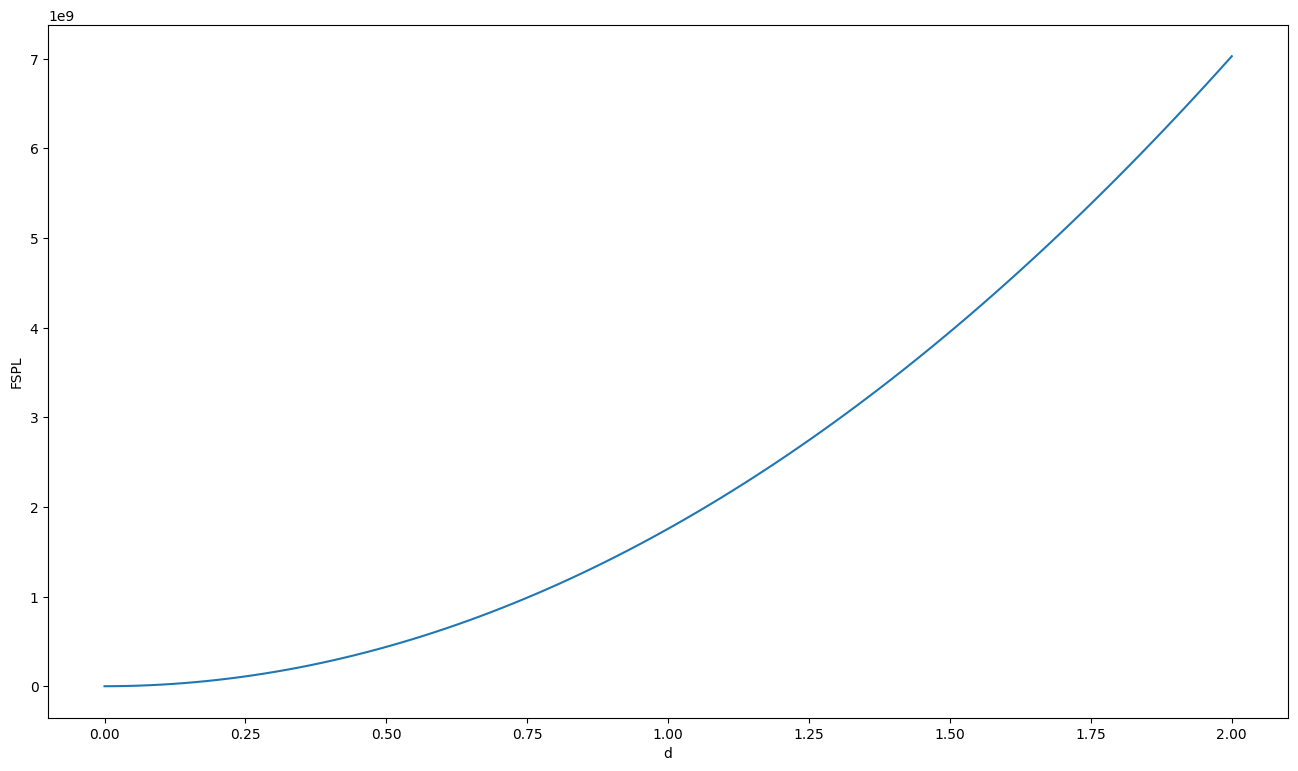

In [15]:
# plot the free space path loss at 1GHz, as a function of distance in km
import math
import scipy.constants

def FSPL(f,d):
    return (4*math.pi*d*f/scipy.constants.c)**2


def plot_FSPL_1GHz_km (d0,d1):
    d=np.linspace(d0, d1, 100)
    
    FSPL_data=FSPL(1e9,1e3*d)
    plt.xlabel("d")
    plt.ylabel("FSPL")
    return plt.plot(d,FSPL_data)

plot_FSPL_1GHz_km(0,2)

As we immediately see, the FSPL goes up to a factor of 7 billion by the time we reach 2 km. At 10km, it would be even worse. This is why the Friis equation is quite often used in dB (again) - to take into account the huge difference in scale. Here we see the true power of logarithms, as the equation turns from a squared fraction into (more or less) a sum.
$$
P_r^\mathrm{dBm}=P_t^\mathrm{dBm}+D_r^\mathrm{dBi}+D_t^\mathrm{dBi}-20\log_{10}\left(\frac{4\pi f_c}{c}d\right)
$$
where we left the last *log* standing because we cannot break it up without making sure that we always take *log*s from dimensionless quantities. We can solve this by inserting reference values above and below the fraction such that we end up with products of dimensionless pieces. This can be done by expressing distance in **km** and frequency in **GHz**, for example: 
$$
\frac{4\pi f_c}{c}d = \frac{4\pi f_c^\mathrm{GHz} 1 \mathrm{GHz}}{c}d^{km}1 \mathrm{km}=\frac{4\pi f_c^\mathrm{GHz} 1 \mathrm{GHz}}{3.10^8\mathrm{m}/\mathrm{s}}d^{km}1 \mathrm{km}=\frac{4\pi f_c^\mathrm{GHz} 1 \mathrm{GHz}}{3.10^{-4}\mathrm{km}\mathrm{GHz}}d^{km}1 \mathrm{km}=\frac{4\pi f_c^\mathrm{GHz}}{3.10^{-4}}d^{km}
$$

And we can now calculate the constant (which will depend on the units we chose i.e. km and GHz) and write the rest in dBx:

$$
P_r^\mathrm{dBm}=P_t^\mathrm{dBm}+D_r^\mathrm{dBi}+D_t^\mathrm{dBi}-92.44\mathrm{dB}-20\log_{10}f_c^\mathrm{GHz}-20\log_{10}d^\mathrm{km} 
$$

Any change in transmit power, or antenna directivity, just translates to a linear shift in the receive power. If your antennas are isotropic, i.e. $D=1$ or $D^\mathrm{dBi}=0$, then at 1 km and 1 GHz, $P_r^\mathrm{dBm}=P_rt^\mathrm{dBm}-92.44\mathrm{dB}$

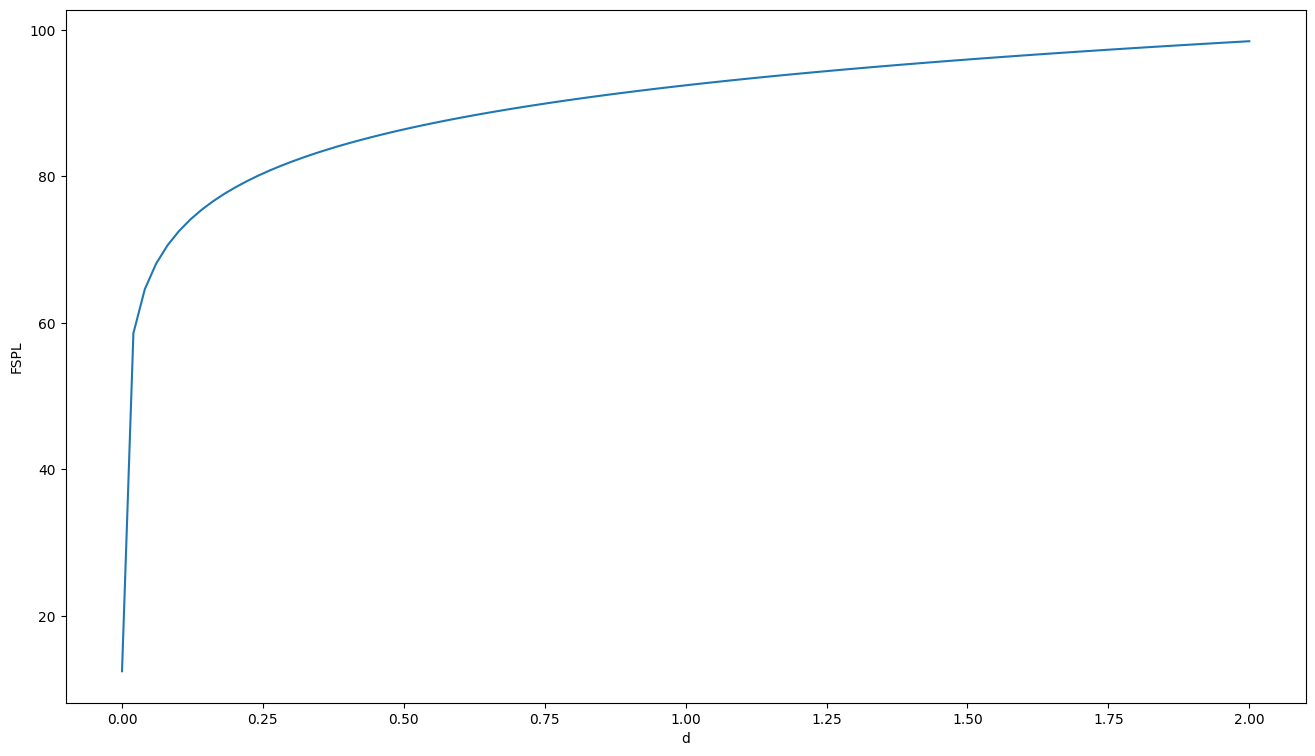

In [16]:
# plot the free space path loss in dB at 1GHz, as a function of distance in km
import math
import scipy.constants


def plot_FSPL_1GHz_km_dB (d0,d1):
    d=np.linspace(d0, d1, 100)
    
    FSPL_dB_data=to_dB(FSPL(1e9,1e3*d))
    plt.xlabel("d")
    plt.ylabel("FSPL")
    return plt.plot(d,FSPL_dB_data)

plot_FSPL_1GHz_km_dB(0.0001,2)

### Typical antenna directivities/gain

In [17]:
directivity_data = [["short dipole",1.5,0],
                     ["1/2 wave dipole",1.64,0],
                     ["patch (low)",3,0],
                     ["patch (high)",6,0],
                     ["horn (low)",10,0],
                     ["horn (high)",100,0],
                     ["dish (low)",10,0],
                     ["dish (high)",100000,0]
               ]
directivity = pd.DataFrame(directivity_data, columns=["Type", "Directivity","Directivity in dB"])
directivity["Directivity in dB"]=directivity["Directivity"].apply(lambda D: to_dB(D))

directivity.style.format({
                            "Directivity": "{:.1f}",
                           "Directivity in dB": "{:.1f}"
                          }).hide(axis="index")

Type,Directivity,Directivity in dB
short dipole,1.5,1.8
1/2 wave dipole,1.6,2.1
patch (low),3.0,4.8
patch (high),6.0,7.8
horn (low),10.0,10.0
horn (high),100.0,20.0
dish (low),10.0,10.0
dish (high),100000.0,50.0


## Putting it all together (class exercise)
Take a satellite uplink to a geosynchronous satellite, with a center frequency of 4GHz, dish antennas with 44 (at the satellite) and 48 dB (ground station) gain respectively, and a transponder bandwidth of 36MHz. The maximum transmit power is 250W. What is the maximum uplink capacity it the only noise is thermal?

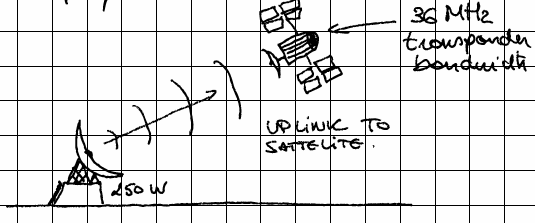

### Steps
1. calculate the FSPL
2. calculate the receive power
3. calculate the noise 
4. calculate the SNR 
5. calculate the capacity

### Reference solution

In [18]:
# everything in dB unless otherwise stated

PL=to_dB(FSPL(4e9,36e6))
print("FSPL in dB:",PL)

FSPL in dB: 195.61503306378836


In [19]:
P_t=power_in_dBm(250e3) #note that you have to give the power in mW
print("Transmit power in dBm:",P_t)

Transmit power in dBm: 53.979400086720375


In [20]:
P_r=P_t+44+48-PL
print("Receive power in dBm:",P_r)

Receive power in dBm: -49.635632977067985


In [21]:
N0W=power_in_dBm(noise_level_mW(36,300))
print("Receiver noise in dBm:",N0W)

Receiver noise in dBm: -98.42724603545963


In [22]:
SNR=P_r-N0W
print("SNR in dB:",SNR)
print(f"Spectral efficiency: {spectral_efficiency(to_ratio(SNR))} bits/Hz")

SNR in dB: 48.79161305839165
Spectral efficiency: 16.20824207641638 bits/Hz


In [23]:
C=shannon(36E6,noise_PSD(300),to_W(P_r))
print(f"Capacity: {C} bits/s or {C/1e6} Mbps")

Capacity: 583496714.7509899 bits/s or 583.4967147509899 Mbps


## How to use to calculate coverage?
We can put all of this together, to calculate the capacity as a function of distance. When it drops below a certain value that we consider too low - that's our capacity limit.

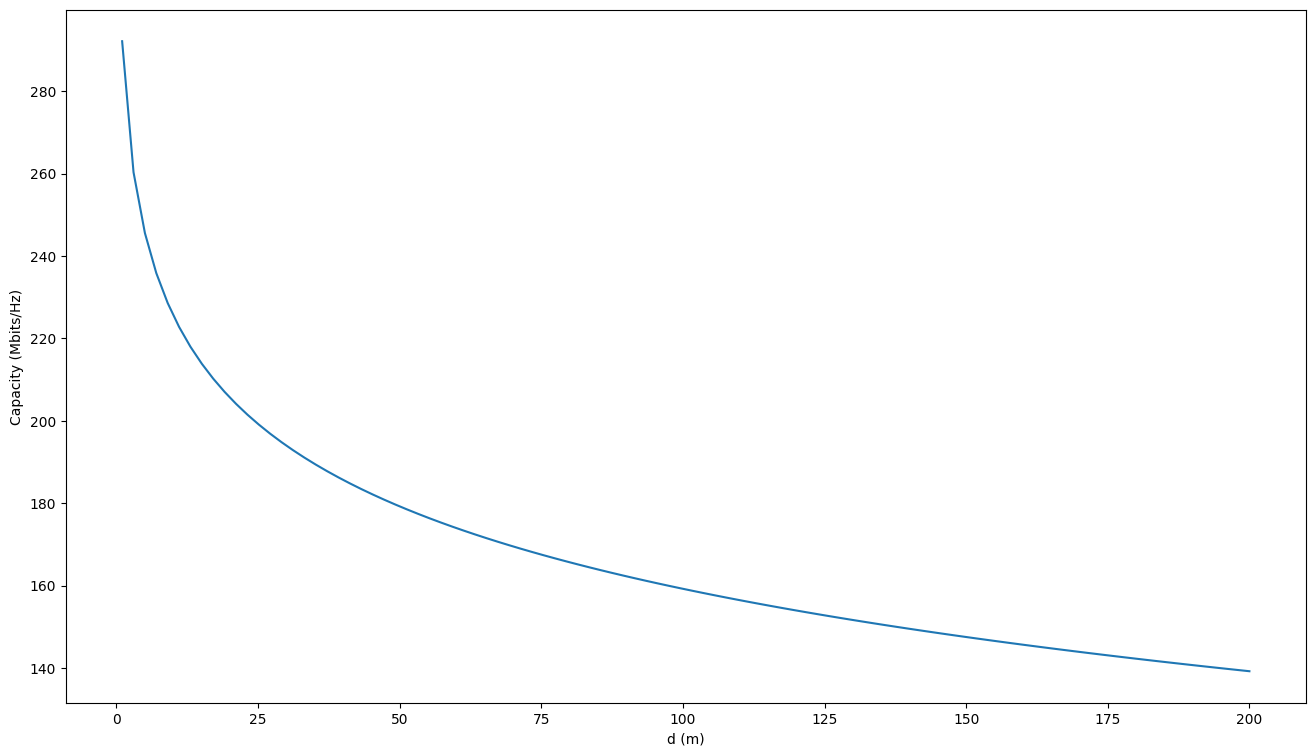

In [24]:
def capacity_at_a_distance(d_m,P_t_dBm,Dr_dB,Dt_dB,f_Hz=1e9,W_Hz=10E6,T=300,extra_NF=0):
    PL=to_dB(FSPL(f_Hz,d_m))
    P_r=P_t_dBm+Dr_dB+Dt_dB-PL-extra_NF
    C=shannon(W_Hz,noise_PSD(T),to_W(P_r))
    return C

def plot_capacity_WiFi1_AP():
    d=np.linspace(1, 200, 100)
    C_data=capacity_at_a_distance(d,24,0,0,2.4e9,10e6,300,0)
    
    plt.xlabel("d (m)")
    plt.ylabel("Capacity (Mbits/Hz)")
    return plt.plot(d,C_data/1e6)

plot_capacity_WiFi1_AP()

You should realize that this is waaaaaay bigger than what Wifi1 actually could achieve. 2 reasons are present for this:
1. This is the AP total capacity - you'll want to share it over many terminals
2. The technology at that time did not (as we will see) allow us to actually use the full SNR headroom (1bit / 3dB)

Note: if you look up this on the web, you will often find 6dB per bit as a limit - this is a result of how you can encode bits - in a wireless system, we actually have 2 dimensions (amplitude/phase), whereas the 6dB / bit is when you only have 1 dimension. Shannon's law is often written as 2W.log(1+SNR) for this reason but we avoid it to have a consistent use of BW.

In [25]:
# everything in dB unless otherwise stated

print("WiFi example at 20m")

PL=to_dB(FSPL(2.4e9,20))
print("FSPL in dB:",PL)

P_t=power_in_dBm(200) #note that you have to give the power in mW
print("Transmit power in dBm:",P_t)

P_r=P_t-PL
print("Receive power in dBm:",P_r)

N0W=power_in_dBm(noise_level_mW(10,300))
print("Receiver noise in dBm:",N0W)

SNR=P_r-N0W
print("SNR in dB:",SNR)
print(f"Spectral efficiency: {spectral_efficiency(to_ratio(SNR))} bits/Hz")

C=shannon(10E6,noise_PSD(300),to_W(P_r))
print(f"Capacity: {C} bits/s or {C/1e6} Mbps")


WiFi example at 20m
FSPL in dB: 66.07260796939512
Transmit power in dBm: 23.010299956639813
Receive power in dBm: -43.06230801275531
Receiver noise in dBm: -103.99027104313251
SNR in dB: 60.9279630303772
Spectral efficiency: 20.23983238062672 bits/Hz
Capacity: 202398323.80626723 bits/s or 202.39832380626723 Mbps
